In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

#TO MAKE PLOTS LOOK NICER
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle= cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [2]:
data_files=glob('*.m4a')
data_files
alcon, sr = librosa.load(data_files[0])
#black, sr = librosa.load(data_files[1])
#colibrie, sr = librosa.load(data_files[2])

/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


# ALCON

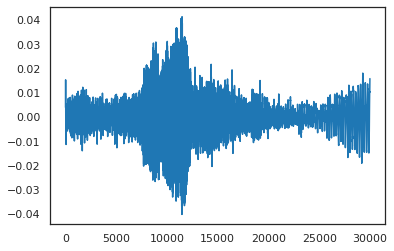

In [10]:
from IPython.display import Audio
f=alcon[70000:100000]
plt.plot(f)
Audio(data=f, rate=sr)

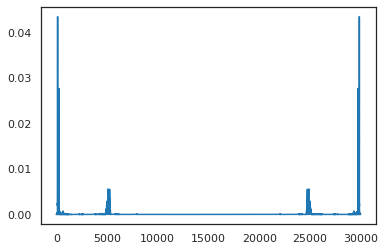

In [11]:
n=len(f)
fhat= np.fft.fft(f,n)
PSD =fhat * np.conj(fhat)/n 
plt.plot(PSD)


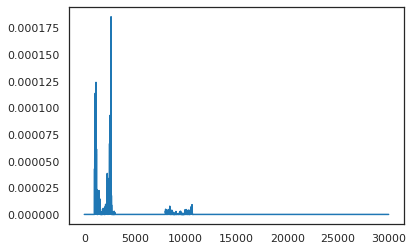

In [12]:
len(PSD)
V=[]
for i in range(0,len(PSD)):
    if 1000<i<3000:
        V.append(1)
    elif 8000<i<11000:
        V.append(1)
    else:
        V.append(0)
PSD2=PSD*V
plt.plot(PSD2)

In [15]:
dt=1/n
t = np.arange(0,1,dt)
freq = (1/(dt*n)) * np.arange(n) 
L = np.arange(1,np.floor(n/2), dtype='int') #Only plt the first half

<function matplotlib.pyplot.legend(*args, **kwargs)>

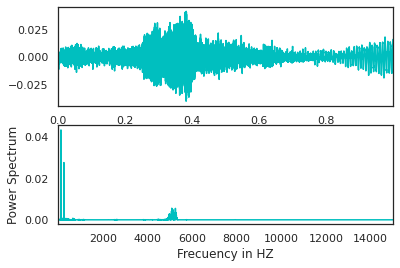

In [16]:
fig, axs= plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c', label='Noisy')
plt.xlim(t[0], t[-1])
plt.legend

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c', label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('Frecuency in HZ')
plt.ylabel('Power Spectrum')
plt.legend

In [17]:
indices = PSD >0 #find all frecuencies with  large power
ind=[]
for i in PSD:
    if i<0.0005:
        ind.append(1)
    else:
        ind.append(0)

PSDclean = PSD * V #Zero out all others
fhat = V * fhat # Zero out small Fourier coeffs in Y


ffilt = np.fft.ifft(fhat)  #Inverse 

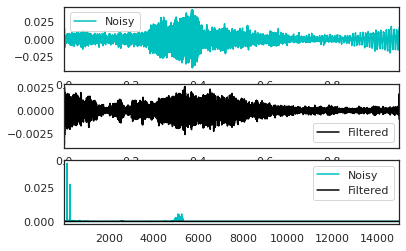

In [18]:
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c', label='Noisy')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k', label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c', label='Noisy')
plt.plot(freq[L],PSDclean[L], color='k', label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()



In [19]:
Audio(data=ffilt, rate=sr)

/usr/lib/python3/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
